In [3]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [4]:
# Load the SVHN dataset
(ds_train, ds_test), ds_info = tfds.load(
    'svhn_cropped',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.NWXTJ9_3.0.0/svhn_cropped-train.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.NWXTJ9_3.0.0/svhn_cropped-test.tfrecord*...:   0%|…

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/incomplete.NWXTJ9_3.0.0/svhn_cropped-extra.tfrecord*...:   0%…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


In [5]:
# Function to preprocess the data
def preprocess(image, label):
    # Normalize the image to [0, 1] range
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [6]:
# Apply preprocessing to the datasets
batch_size = 64
ds_train = ds_train.map(preprocess).shuffle(10000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [7]:
# Define a CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')  # 10 classes for digits 0-9
    ])
    return model

In [8]:
# Create the model
model = create_model()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Train the model
history = model.fit(
    ds_train,
    epochs=15,
    validation_data=ds_test
)

Epoch 1/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 149s 128ms/step - accuracy: 0.8883 - loss: 0.3733 - val_accuracy: 0.9218 - val_loss: 0.2814
Epoch 2/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 139s 119ms/step - accuracy: 0.8923 - loss: 0.3605 - val_accuracy: 0.9264 - val_loss: 0.2698
Epoch 3/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 139s 120ms/step - accuracy: 0.8922 - loss: 0.3615 - val_accuracy: 0.9305 - val_loss: 0.2576
Epoch 4/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 138s 120ms/step - accuracy: 0.8951 - loss: 0.3532 - val_accuracy: 0.9287 - val_loss: 0.2584
Epoch 5/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 139s 120ms/step - accuracy: 0.8934 - loss: 0.3550 - val_accuracy: 0.9281 - val_loss: 0.2710
Epoch 6/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 144s 125ms/step - accuracy: 0.8953 - loss: 0.3560 - val_accuracy: 0.9284 - val_loss: 0.2629
Epoch 7/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 198s 122ms/step - accuracy: 0.8944 - loss: 0.3490 - val_accuracy: 0.9323 - val_loss: 0.2521
Epoch 8/15
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 141s 122ms/step - ac

In [16]:

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

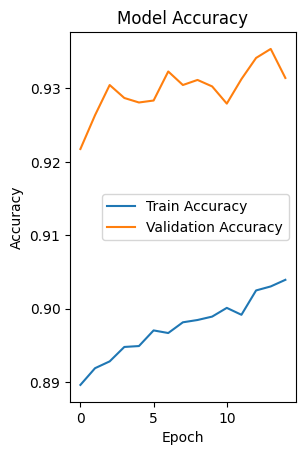

In [17]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

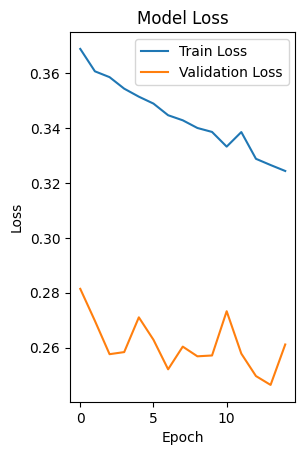

In [18]:
# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [19]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

407/407 ━━━━━━━━━━━━━━━━━━━━ 26s 65ms/step - accuracy: 0.9319 - loss: 0.2531
Test Accuracy: 93.14%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


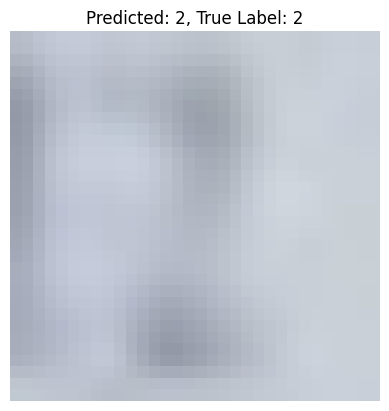

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


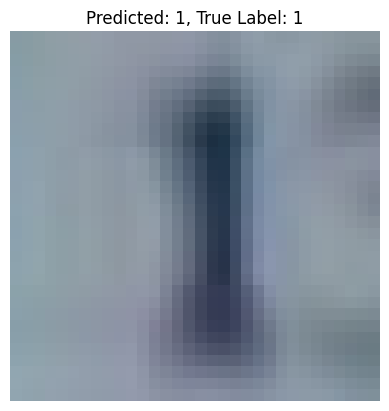

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


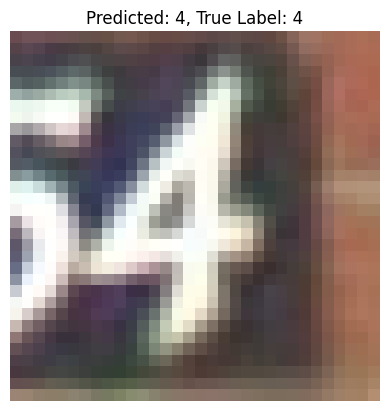

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


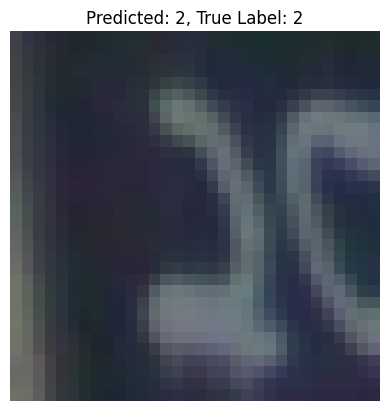

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


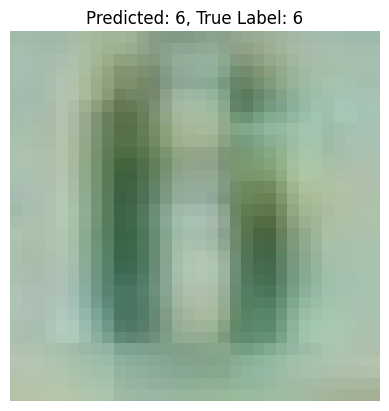

In [21]:
# Make predictions on a few test samples
for image, label in ds_test.take(5):
    pred = model.predict(tf.expand_dims(image[0], axis=0))
    plt.imshow(image[0].numpy())
    plt.title(f"Predicted: {tf.argmax(pred[0]).numpy()}, True Label: {label[0].numpy()}")
    plt.axis('off')
    plt.show()
